In [180]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import scipy.stats as ss
import statsmodels.api as sm
import math
import random
plt.rcParams["figure.figsize"] = (8,8)

In [181]:
#Real Estate
df = pd.read_csv("NYC_Real_Estate.csv")
df.head()


,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


In [182]:
df.tail()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
48243,5,7349,34,10309,2,2,2575,1998,Low,B9,450000
48244,5,7349,78,10309,2,2,2377,1998,Low,B9,550000
48245,5,7351,60,10309,2,2,1496,1925,Low,B2,460000
48246,5,7100,28,10309,0,7,64117,2001,High,K6,11693337
48247,5,7105,679,10309,0,1,2400,2006,High,P9,69300


In [183]:
#checking the shape of the table
df.shape

(48248, 11)

In [184]:
# checking to see the total count of missing values, if any
df.isnull().sum().sum()

0

In [82]:
df.dtypes

BOROUGH                            int64
BLOCK                              int64
LOT                                int64
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
TOTAL UNITS                        int64
GROSS SQUARE FEET                  int64
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE         object
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                         int64
dtype: object

In [185]:
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


In [187]:
#Join buiding information into one column by 'Borough'-'Block'-'Lot'-'Year Built', 'BuildingClass At Time of Sale'
df['BuildingInfo']=df['BOROUGH'].map(str)+'-'+df['BLOCK'].map(str)+'-'+df['LOT'].map(str)+'-'+df['YEAR BUILT'].map(str)+'-'+df['BUILDING CLASS AT TIME OF SALE'].map(str)
df.drop('BOROUGH', axis=1, inplace=True)
df.drop('BLOCK', axis=1, inplace=True)
df.drop('LOT', axis=1, inplace=True)
df.drop('ZIP CODE', axis=1, inplace=True)
df.drop('YEAR BUILT', axis=1, inplace=True)
df.drop('TAX CLASS AT TIME OF SALE', axis=1, inplace=True)
df.drop('BUILDING CLASS AT TIME OF SALE', axis=1, inplace=True)
df.head()

,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,BuildingInfo
0,5,5,6440,6625000,1-392-6-1900-C2
1,10,10,6794,3936272,1-402-21-1913-C4
2,6,6,4615,8000000,1-404-55-1900-C2
3,8,8,4226,3192840,1-406-32-1920-C4
4,24,24,18523,16232000,1-387-153-1920-D9


In [189]:
df.head(5)

,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,BuildingInfo
0,5,5,6440,6625000,1-392-6-1900-C2
1,10,10,6794,3936272,1-402-21-1913-C4
2,6,6,4615,8000000,1-404-55-1900-C2
3,8,8,4226,3192840,1-406-32-1920-C4
4,24,24,18523,16232000,1-387-153-1920-D9


In [190]:
from sklearn import linear_model
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
encod_BuildingInfo=label_encoder.fit_transform(df['BuildingInfo'])

In [192]:
df.describe()

,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE
count,48248.000000,48248.000000,4.824800e+04,4.824800e+04
mean,2.569682,2.837755,3.672552e+03,1.155576e+06
std,17.468624,20.752771,2.947540e+04,1.340423e+07
min,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.000000,1.000000,8.280000e+02,8.056000e+04
50%,1.000000,1.000000,1.620000e+03,4.800000e+05
75%,2.000000,2.000000,2.520000e+03,8.300000e+05
max,1844.000000,2261.000000,3.750565e+06,2.210000e+09


In [193]:
#Residential Units, Total Units, Gross Square Feet and Sale Price have a min of 0
#Lets remove the rows with '0' values
#Fist Calculate how many zeros do we have
(df==0).sum().sum()

34820

In [194]:
#there are 3482 zeros in the data frame.
#now lets remove all rows with zeros
df=df[df['RESIDENTIAL UNITS'] !=0]

In [195]:
(df==0).sum().sum()

13197

In [196]:
df=df[df['GROSS SQUARE FEET'] !=0]

In [197]:
(df==0).sum().sum()

6959

In [198]:
df=df[df['SALE PRICE'] !=0]

In [199]:
(df==0).sum().sum()

0

#Removed all rows with '0'

In [200]:
df.shape

(28048, 5)

In [201]:
df.head(25)

,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,BuildingInfo
0,5,5,6440,6625000,1-392-6-1900-C2
1,10,10,6794,3936272,1-402-21-1913-C4
2,6,6,4615,8000000,1-404-55-1900-C2
3,8,8,4226,3192840,1-406-32-1920-C4
4,24,24,18523,16232000,1-387-153-1920-D9
5,10,10,12350,10350000,1-400-21-2009-D1
6,24,24,16776,11900000,1-376-14-1928-C6
7,47,47,36472,28000000,1-385-1102-2005-RR
8,3,4,3360,3300000,1-391-19-1910-S3
9,4,5,5608,7215000,1-393-4-1900-S4


In [202]:
# seeing values of 10 in the SALE Price column. Investigate:
# #using the threshold, how many values less than 1000 in dataframe?
df[df['SALE PRICE']<10000].count()

RESIDENTIAL UNITS    854
TOTAL UNITS          854
GROSS SQUARE FEET    854
SALE PRICE           854
BuildingInfo         854
dtype: int64

In [204]:
# There are 752 instances where the Sale Price is less than $1000; We need to get rid of these rows as these seem to be 'hand me down' estates
df_filt=df[df['SALE PRICE']>10000]

In [205]:
df_filt.head()

,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,BuildingInfo
0,5,5,6440,6625000,1-392-6-1900-C2
1,10,10,6794,3936272,1-402-21-1913-C4
2,6,6,4615,8000000,1-404-55-1900-C2
3,8,8,4226,3192840,1-406-32-1920-C4
4,24,24,18523,16232000,1-387-153-1920-D9


In [206]:
df_filt.tail()

,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,BuildingInfo
48241,2,2,1300,509000,5-7316-93-1995-B2
48242,2,2,2160,648000,5-7317-126-1994-B2
48243,2,2,2575,450000,5-7349-34-1998-B9
48244,2,2,2377,550000,5-7349-78-1998-B9
48245,2,2,1496,460000,5-7351-60-1925-B2


In [207]:
df_filt.drop('RESIDENTIAL UNITS', axis=1, inplace=True)

C:\Users\Inspiron2021\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [208]:
df_filt.head()

,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,BuildingInfo
0,5,6440,6625000,1-392-6-1900-C2
1,10,6794,3936272,1-402-21-1913-C4
2,6,4615,8000000,1-404-55-1900-C2
3,8,4226,3192840,1-406-32-1920-C4
4,24,18523,16232000,1-387-153-1920-D9


In [209]:
print('#########################################################')
print('              Info of the DataSet'                        )
print('#########################################################')
df_filt.info()

#########################################################
              Info of the DataSet
#########################################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27155 entries, 0 to 48245
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TOTAL UNITS        27155 non-null  int64 
 1   GROSS SQUARE FEET  27155 non-null  int64 
 2   SALE PRICE         27155 non-null  int64 
 3   BuildingInfo       27155 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.0+ MB


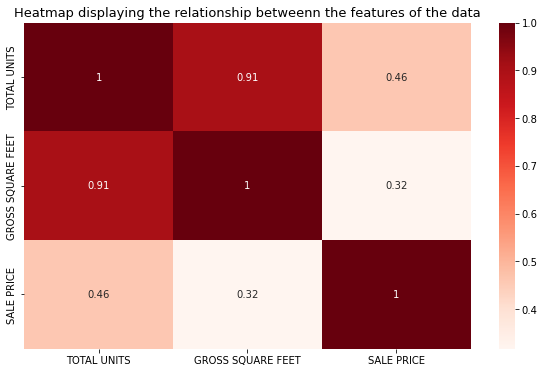

In [210]:
plt.figure(figsize=(10,6))
sns.heatmap(df_filt.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweenn the features of the data',
         fontsize=13)
plt.show()

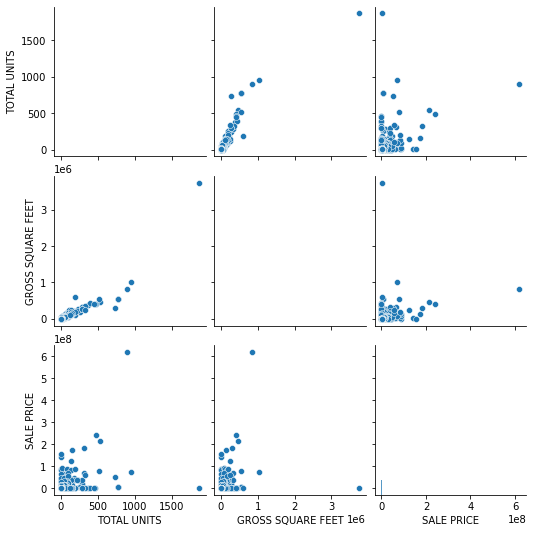

In [211]:
sns.pairplot(df_filt)

In [167]:
df_filt.describe()

,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE
count,27155.00000,2.715500e+04,2.715500e+04
mean,3.27192,3.403748e+03,1.175735e+06
std,20.91236,2.787394e+04,5.566935e+06
min,1.00000,1.500000e+02,1.000100e+04
25%,1.00000,1.350000e+03,4.330000e+05
50%,2.00000,1.831000e+03,6.250000e+05
75%,2.00000,2.550000e+03,9.314490e+05
max,1866.00000,3.750565e+06,6.200000e+08


In [33]:
df_filt1=df_filt[df_filt['GROSS SQUARE FEET']< 1500000]
df_filt1=df_filt[df_filt['SALE PRICE']< 320000000]

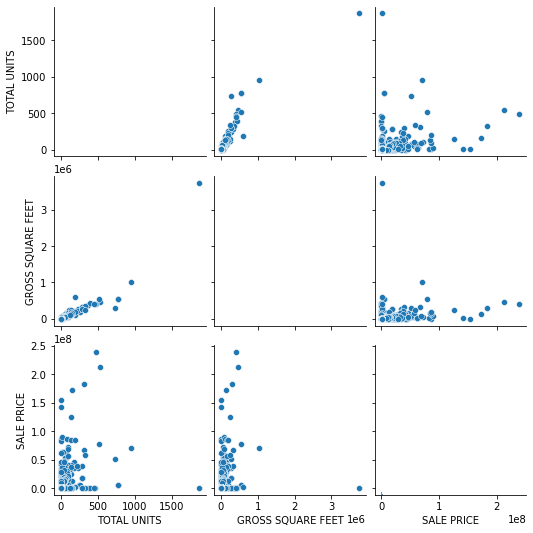

In [34]:
sns.pairplot(df_filt1)

In [216]:
#Input Feature = Total Units and Gross Square Feet
X=df[['TOTAL UNITS', 'GROSS SQUARE FEET']]
#Target Variable= SALE PRICE
y=df['SALE PRICE']

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=5)
X_train


,TOTAL UNITS,GROSS SQUARE FEET
21608,2,2898
23391,2,1920
37820,1,1392
35798,1,1350
43485,1,1400
...,...,...
6339,1,1290
46449,1,1400
40510,1,1364
38645,1,1248


In [218]:
regression=LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [219]:
coeff_df_filt=pd.DataFrame(regression.coef_, X.columns, columns=['Coefficient'])
coeff_df_filt

,Coefficient
TOTAL UNITS,196119.207274
GROSS SQUARE FEET,-91.445578


In [220]:
predict=regression.predict(X_test)

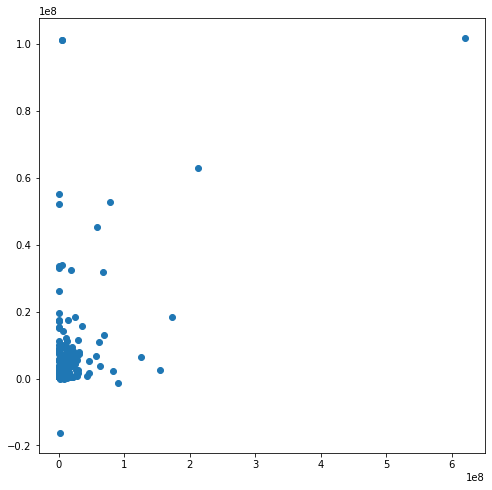

In [221]:
plt.scatter(y_test, predict)

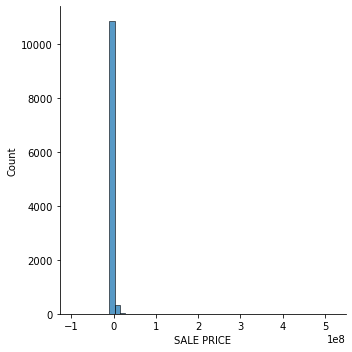

In [222]:
sns.displot((y_test-predict), bins=50)

In [ ]:
# The model as not predicted a STRONG reagression.
# The model is not well predicted.

In [145]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2999.
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:11:32   Log-Likelihood:            -2.7803e+05
No. Observations:               16828   AIC:                         5.561e+05
Df Residuals:                   16826   BIC:                         5.561e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.948e+05   2.83e+04     31.672      

<h1>1.	LINEAR Regression of NYC_Real_Estate data

<h3>OVERVIEW: Target variable is ‘SALE PRICE’
<h3>We will be using the Multiple Regression as there are more than one variable that will affect the SALE PRICE. Namely, Total Units and Gross Square Feet.
<h3>Data has 12 columns:
<h3>•	BOROUGH-represents where the property is located
<h3>•	BLOCK/LOT: represent a unique key where for where the property is located
<h3>•	ZIP CODE
<h3>•	RESIDENTIAL UNITS: the number of residential units at the property
<h3>•	TOTAL UNITS: Total number of units at listed property
<h3>•	GROSS SQUARE FEET: total area of floors of the building, incl land and interior space within building
<h3>•	YEAR BUILD AT TIME OF SALE: when the property was build
<h3>•	TAX CLASS AT TIME OF SALE: 
<h3>•	Building class at time of sale: classification used to describe the property’s construction use at time of sale
<h3>•	SALE PRICE: what the property was sold at.

<h3>Data Cleaning:
<h3>•	Check for NUL values
<h3>•	Combined columns BOROUGH/BLOCK/LOT/YEARBUILD/BUILDING CLASS AT TIME OF SALE into one column called ‘BuildingInfo’
<h3>•	Dropped the columns used to combine and ZIP CODE and TAX Class AT TIME OF SALE.
<h3>•	Removed rows where columns = 0
<h3>•	Filtered SALE PRICE to a threshold of values that are over 10000; because there were 854 rows with unrealistic values below the threshold. Unrealistic for NYC standards.
<h3>Conclusion:
<h3>•	Multiple Regression did not result in a good model, as the R_sqr value is very very low at 0.151
<h3>•	The Coefficients:
<h3>o	Total Units =196119.20
<h3>o	GROSS SQUARE FEET=-91.445578
